# TASK-2: IRIS FLOWER CLASSIFICATION
Author:- Kunal Kumar

Batch:- July

Domain:- Data science

Aim:- to develop a model that can classify this flowers into different species based on their sepal and petal measurements

In [62]:
import numpy as np

In [63]:
import pandas as pd

In [64]:
import matplotlib.pyplot as plt

In [65]:
import seaborn as sns

In [85]:
df = pd.read_csv("IRIS.csv")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
#to basic info about datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [102]:
#to display no. of samples on each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [104]:
#check for null values
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [87]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

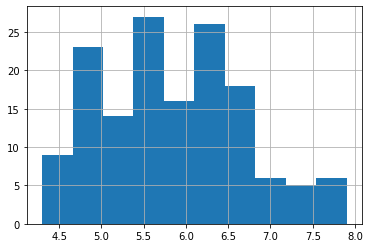

In [105]:
df['sepal_length'].hist()

<AxesSubplot:>

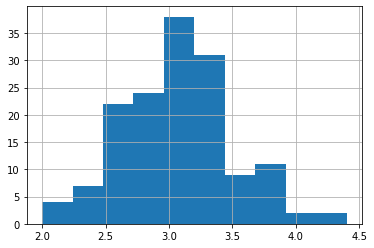

In [106]:
df['sepal_width'].hist()

<AxesSubplot:>

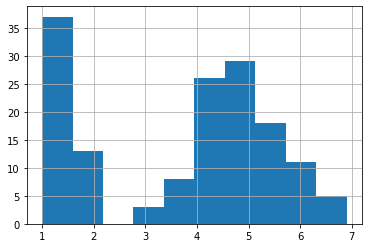

In [107]:
df['petal_length'].hist()

<AxesSubplot:>

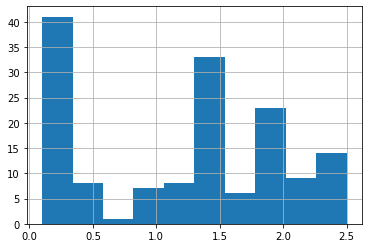

In [108]:
df['petal_width'].hist()

In [95]:
#scatterplot
colors = ['red','orange','blue']
species = ['Iris-virginica','Iris-versicolor','Iris-setosa']

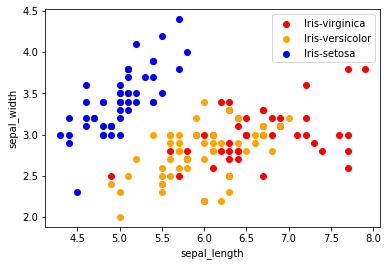

In [96]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label = species[i])
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")
plt.legend()

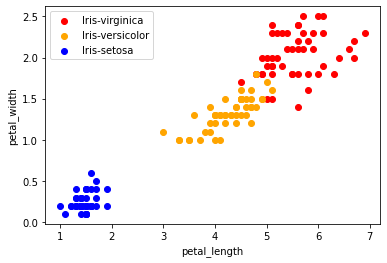

In [97]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("petal_length")
plt.ylabel("petal_width")
plt.legend()

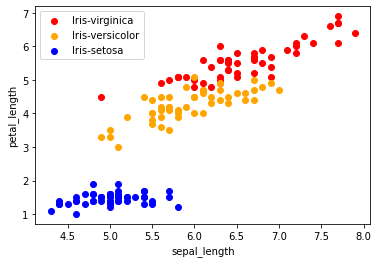

In [98]:
for i in range(3):
    x = df[df['species'] == species[i]]
    
    plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label = species[i])
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()

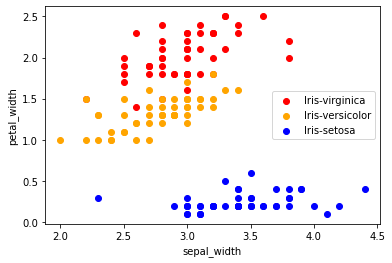

In [99]:
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label = species[i])
plt.xlabel("sepal_width")
plt.ylabel("petal_width")
plt.legend()

In [100]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

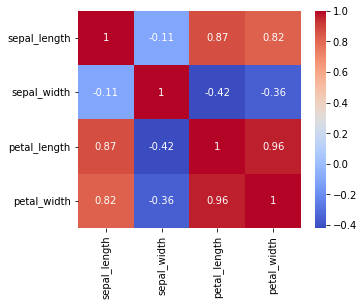

In [101]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True, ax=ax, cmap='coolwarm')

# Label Encoder
in machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers.Labels Encoding refers to converting the labels into numeric from so as to convert it into the machine-readable from



In [189]:
from sklearn import metrics

In [190]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [191]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [216]:
from sklearn.model_selection import train_test_split 

In [220]:
X= df.drop(columns=['species'])
Y= df['species']
x_train,x_test ,y_train , y_test = train_test_split(X,Y,test_size = 0.30)

In [221]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [222]:
#print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556


In [223]:
#knn-k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()


In [224]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [225]:
#print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  97.77777777777777


In [226]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [227]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [228]:
#print metric to get performance
print("Accuracy: ", model.score(x_test,y_test)*100)

Accuracy:  95.55555555555556
